In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#Merging all the 12 months files
path =r'C:\Users\hp\Downloads\SalesData (1)\SalesData'
def merge_file(path):
    df=pd.read_csv(fr'{path}\Sales_April_2019.csv')
    file_name=(os.listdir(path))
    sales_df=pd.DataFrame()
    for i in file_name:
        df=pd.read_csv(fr'{path}\{i}')
        sales_df=pd.concat([sales_df,df])
    return (sales_df)

df=merge_file(path)
#Drop all the Null Values
df=df.dropna()
#remove all the rows where orderid was not in digits
df["temp"]=df["Order ID"].str.isdigit()
df=df.loc[df["temp"]==True]
df.drop(columns=["temp"],inplace=True)
print(df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB
None


In [3]:
# Changing Datatypes according to data.
df["Order ID"]=pd.to_numeric(df["Order ID"],errors='coerce')
df["Quantity Ordered"]=pd.to_numeric(df["Quantity Ordered"],errors='coerce')
df["Price Each"]=pd.to_numeric(df["Price Each"],errors='coerce')
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce', format='%m/%d/%y %H:%M')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB
None


In [11]:
#What are the top-selling products by quantity ordered?
top_selling_product=df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False)
print(top_selling_product)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64


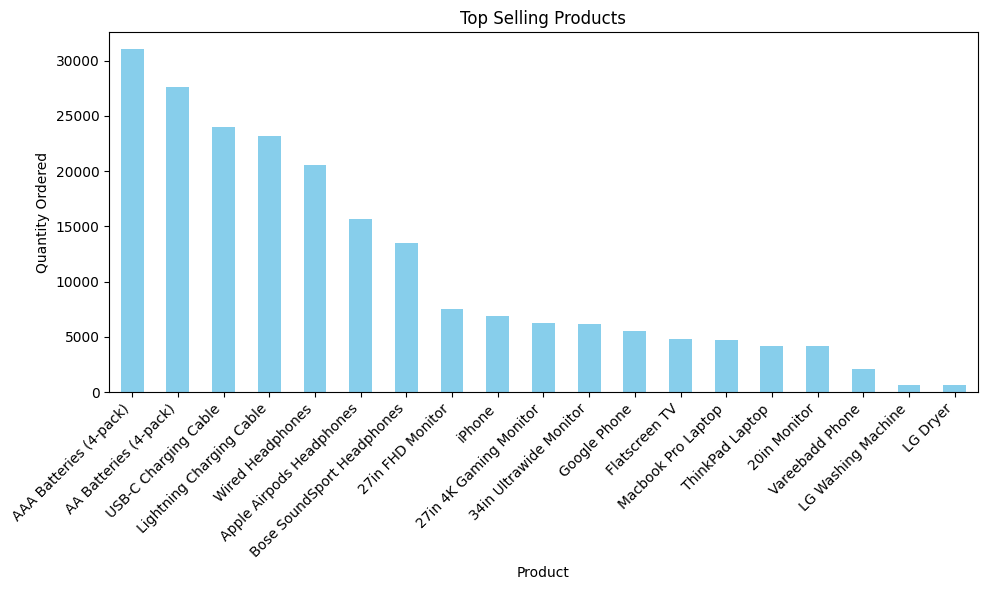

In [36]:
#Plotting the bar chart
plt.figure(figsize=(10, 6))
top_selling_product.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
#What is the total revenue generated for each product?
df["Total_Revenue"]= df["Quantity Ordered"] * df["Price Each"]
total_sales=df.groupby('Product')["Total_Revenue"].sum().sort_values(ascending=False)
print(total_sales)

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Total_Revenue, dtype: float64


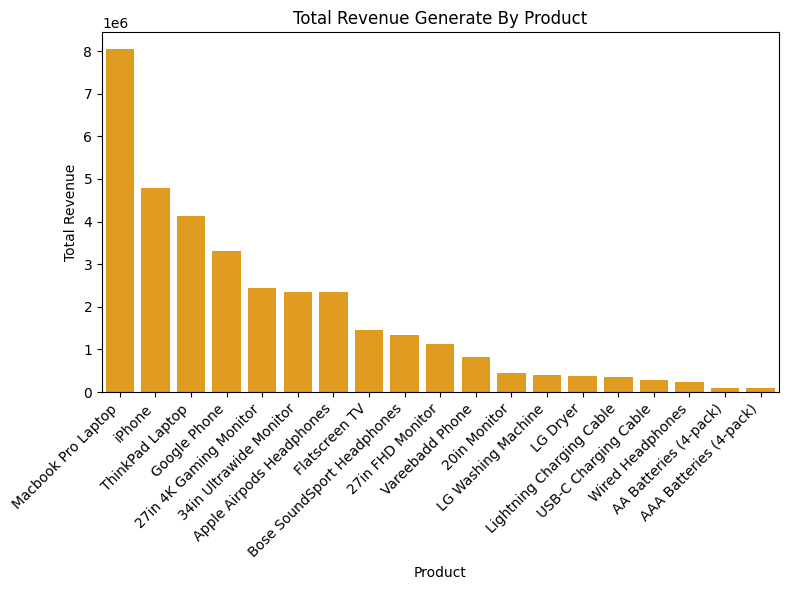

In [34]:
# Plotting the Bar Chart
plt.figure(figsize=(8,6))
sns.barplot(x=total_sales.index, y=total_sales.values, color='orange')
plt.title('Total Revenue Generate By Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
#What is the average price for each product?
avg_price=df.groupby('Product')["Price Each"].mean().sort_values(ascending=False)
print(avg_price)

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64


In [30]:
# Selecting the top 10 results
top_10_avg_price = avg_price.head(10)

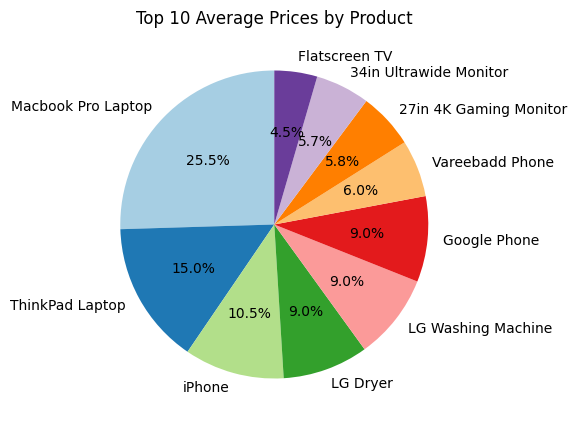

In [32]:
# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(top_10_avg_price, labels=top_10_avg_price.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Average Prices by Product')
plt.show()

In [37]:
#Which city had the highest total sales revenue
df["City"]=df["Purchase Address"].str.split(',',expand=True)[1]
top_sales_city=df.groupby("City")["Total_Revenue"].sum().sort_values(ascending=False)
print(top_sales_city)

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Total_Revenue, dtype: float64


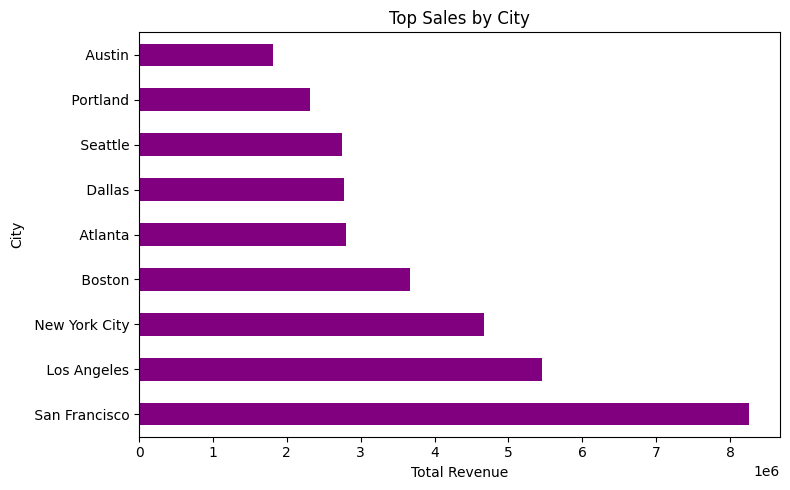

In [45]:
# Plotting the horizontal bar chart
plt.figure(figsize=(8, 5))
top_sales_city.plot(kind='barh', color='purple')
plt.title('Top Sales by City')
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [46]:
#What is the total sales revenue for each month?
df["Month"]=df["Order Date"].dt.month
monthly_sales=df.groupby("Month")["Total_Revenue"].sum()
print(monthly_sales)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total_Revenue, dtype: float64


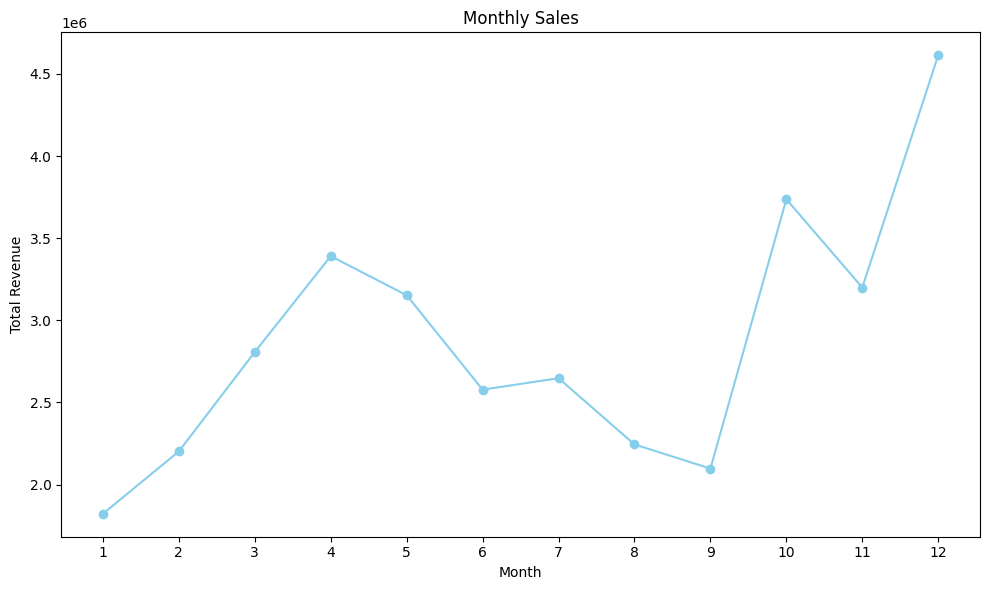

In [48]:
#creating a line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='skyblue', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))  # Assuming you have data for all months
plt.tight_layout()
plt.show()

In [10]:
#What time should we display advertisemens to maximize the likelihood of customer’s buying product?
df["Hour"]=df["Order Date"].dt.hour
df["Minutes"]=df["Order Date"].dt.minute
adv_time=df.groupby("Hour")["Total_Revenue"].sum().sort_values(ascending=False)
print(adv_time)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Total_Revenue, dtype: float64


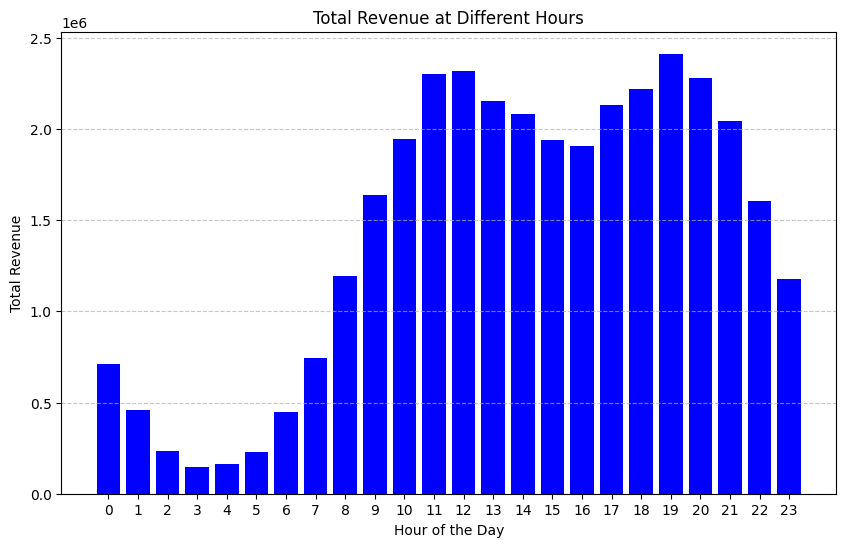

In [55]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(adv_time.index, adv_time.values, color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.title('Total Revenue at Different Hours')
plt.xticks(adv_time.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()